In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [8]:
player_play = pd.read_csv("data/nfl-big-data-bowl-2025/player_play.csv")
games = pd.read_csv("data/nfl-big-data-bowl-2025/games.csv")
plays = pd.read_csv("data/nfl-big-data-bowl-2025/plays.csv")
players = pd.read_csv("data/nfl-big-data-bowl-2025/players.csv")

In [9]:
players["birthDate"] = pd.to_datetime(players['birthDate'], format='mixed', dayfirst=True)

In [10]:
tr_week1 = pd.read_csv("data/nfl-big-data-bowl-2025/tracking_week_1.csv")

In [11]:
tr_week1.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


In [12]:
gameid = 2022091200
games[games["gameId"]==gameid]

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
15,2022091200,2022,1,9/12/2022,20:15:00,SEA,DEN,17,16


In [13]:
plays[plays["gameId"]==gameid].reset_index().sort_values(by="yardsGained", ascending=False).iloc[0]

index                                                                            1625
gameId                                                                     2022091200
playId                                                                           1344
playDescription                     (5:46) (Shotgun) R.Wilson pass deep left to J....
quarter                                                                             2
down                                                                                3
yardsToGo                                                                           2
possessionTeam                                                                    DEN
defensiveTeam                                                                     SEA
yardlineSide                                                                      DEN
yardlineNumber                                                                     33
gameClock                                             

In [14]:
playid = 1344

In [15]:
tr_df = tr_week1[(tr_week1["gameId"]==gameid) & (tr_week1["playId"]==playid)]

In [16]:
tr_df.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
154307,2022091200,1344,38605.0,Russell Wilson,1,BEFORE_SNAP,2022-09-13 01:10:40.3,3.0,DEN,right,38.60,24.04,0.13,0.31,0.01,184.87,21.61,huddle_break_offense
154308,2022091200,1344,38605.0,Russell Wilson,2,BEFORE_SNAP,2022-09-13 01:10:40.4,3.0,DEN,right,38.60,24.05,0.10,0.08,0.01,180.45,15.70,NaN
154309,2022091200,1344,38605.0,Russell Wilson,3,BEFORE_SNAP,2022-09-13 01:10:40.5,3.0,DEN,right,38.61,24.05,0.07,0.18,0.01,177.99,29.76,NaN
154310,2022091200,1344,38605.0,Russell Wilson,4,BEFORE_SNAP,2022-09-13 01:10:40.6,3.0,DEN,right,38.61,24.05,0.07,0.34,0.01,174.23,91.16,NaN
154311,2022091200,1344,38605.0,Russell Wilson,5,BEFORE_SNAP,2022-09-13 01:10:40.7,3.0,DEN,right,38.61,24.05,0.12,0.54,0.01,170.19,159.94,NaN


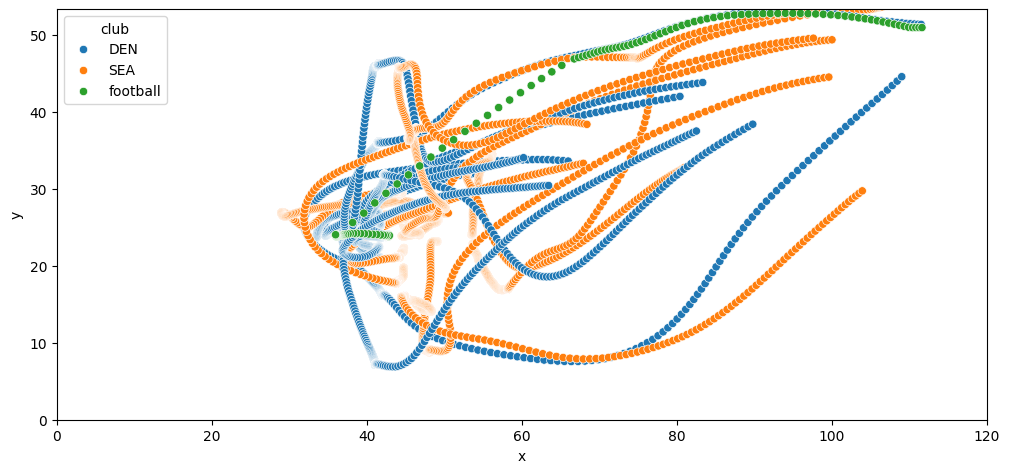

In [17]:
plt.figure(figsize=(12, 5.33))
sns.scatterplot(data=tr_df, x="x", y="y", hue="club")
plt.xlim(0, 120)  # 120 yards long (including end zones)
plt.ylim(0, 53.3)  # 53.3 yards wide
plt.show()

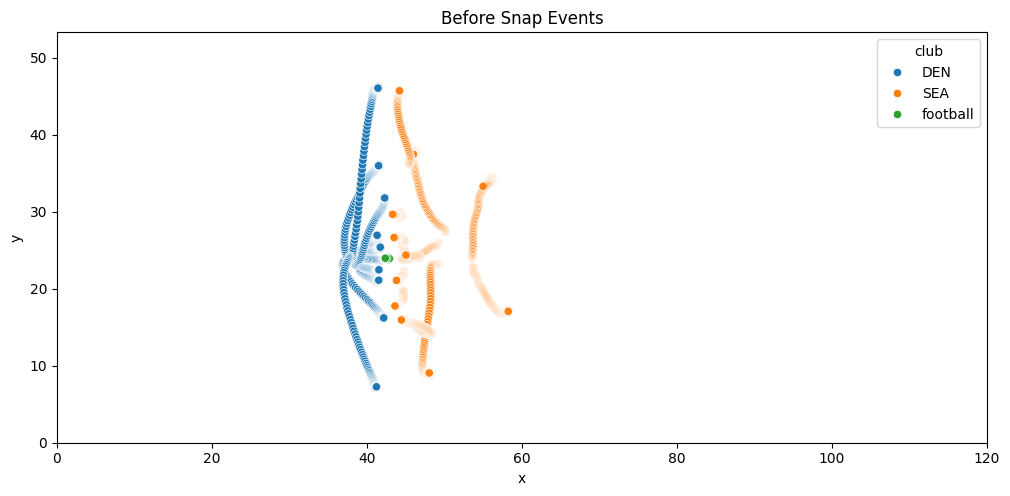

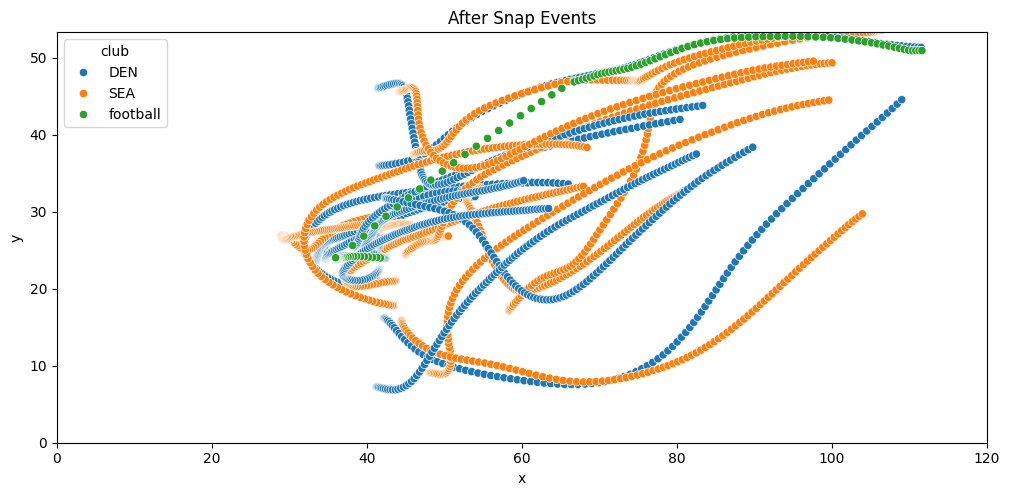

In [18]:
# Filter the data for before_snap and after_snap events
before_snap_df = tr_df[tr_df['frameType'] == 'BEFORE_SNAP']
after_snap_df = tr_df[tr_df['frameType'] == 'AFTER_SNAP']


plt.figure(figsize=(12, 5.33))
sns.scatterplot(data=before_snap_df, x="x", y="y", hue="club")
plt.title('Before Snap Events')
plt.xlim(0, 120)  
plt.ylim(0, 53.3)  
plt.show()


plt.figure(figsize=(12, 5.33))
sns.scatterplot(data=after_snap_df, x="x", y="y", hue="club")
plt.title('After Snap Events')
plt.xlim(0, 120)  
plt.ylim(0, 53.3)  
plt.show()

In [19]:
tr_df["event"].unique()

array(['huddle_break_offense', nan, 'line_set', 'ball_snap',
       'pass_forward', 'pass_arrived', 'first_contact', 'touchdown'],
      dtype=object)

Run vs Pass

`isDropback` is the taget varibale in this case. If the QB dropped back that means the outcome is  pass, sack, or scramble

In [26]:
plays["isDropback"].value_counts()

isDropback
True     9736
False    6388
Name: count, dtype: int64

For starting out I want to explore 